In [120]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')


In [121]:
#xs = np.array([1,2,3,4,5,6], dtype=np.float64)
#ys = np.array([5,4,6,5,6,7], dtype=np.float64)
#plt.scatter(xs, ys)
#plt.show()

def create_dataset(hm, variance, step=2, correlation = False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype =np.float64), np.array(ys, dtype=np.float64)

In [122]:
def best_fit_slope_and_intercept(xs, ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) / ((mean(xs)**2) - mean(xs **2)) )
    #PEMDAS
    b = mean(ys) - m * mean(xs)
    return m, b

m, b = best_fit_slope_and_intercept(xs, ys)
print(m, b)

2.0626641651031887 -1.5219512195121752


In [123]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    #for every y in ys_orig calculate mean of ys orig
    y_mean_line =[mean(ys_orig) for y in ys_orig]
    #y_mean = mean(ys)
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    #print(y_mean_line)
    return 1 -(squared_error_regr / squared_error_y_mean) 

In [124]:
xs, ys = create_dataset(40, 80, 2, correlation ='pos')

In [125]:
predict_x = 8
predict_y = (m * predict_x) + b
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.2345706531953241


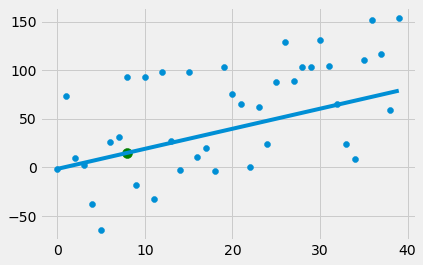

In [126]:
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, s=100, color ='g')
plt.plot(xs, regression_line)
plt.show()